## **BLINKIT ANALYSIS IN PYTHON**

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Raw Data**

In [2]:
df=pd.read_csv("C:/Users/0049OX744/Downloads/blinkit_data.csv")

### **Sample Data**

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Size of Data**

In [4]:
df.shape

(8523, 12)

### **Field Information**

In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Data Types**

In [6]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### **Data Cleaning**

In [7]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [8]:
df['Item Fat Content']=df['Item Fat Content'].replace( {'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'} )

In [9]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### **KPI Requirements**

In [20]:
#Total Sales
Total_Sales = df['Sales'].sum()

#Average Sales
Average_Sales = df['Sales'].mean()

#Number of Items
Total_Items = df['Item Identifier'].count()

#Average Rating
Average_Rating = df['Rating'].mean()

#Display

print(f"Total Sales: ${Total_Sales:,.0f}")
print(f"Average Sales: ${Average_Sales:,.0f}")
print(f"Total Items: {Total_Items}")
print(f"Average Rating: {Average_Rating:,.1f}")

Total Sales: $1,201,681
Average Sales: $141
Total Items: 8523
Average Rating: 4.0


### **Data Representation**

#### **Total Sales by Fat Content**

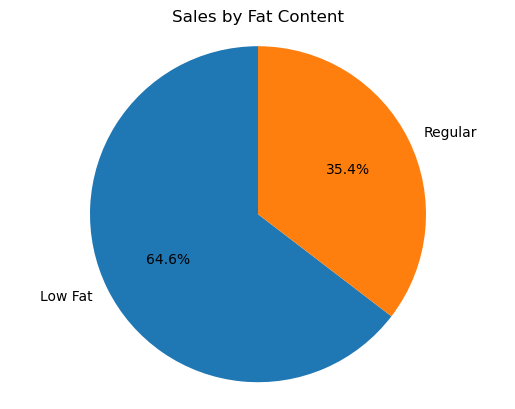

In [25]:
Sales_by_Fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(Sales_by_Fat, labels=Sales_by_Fat.index,
        autopct = '%.1f%%',
        startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### **Total Sales by Item Type**

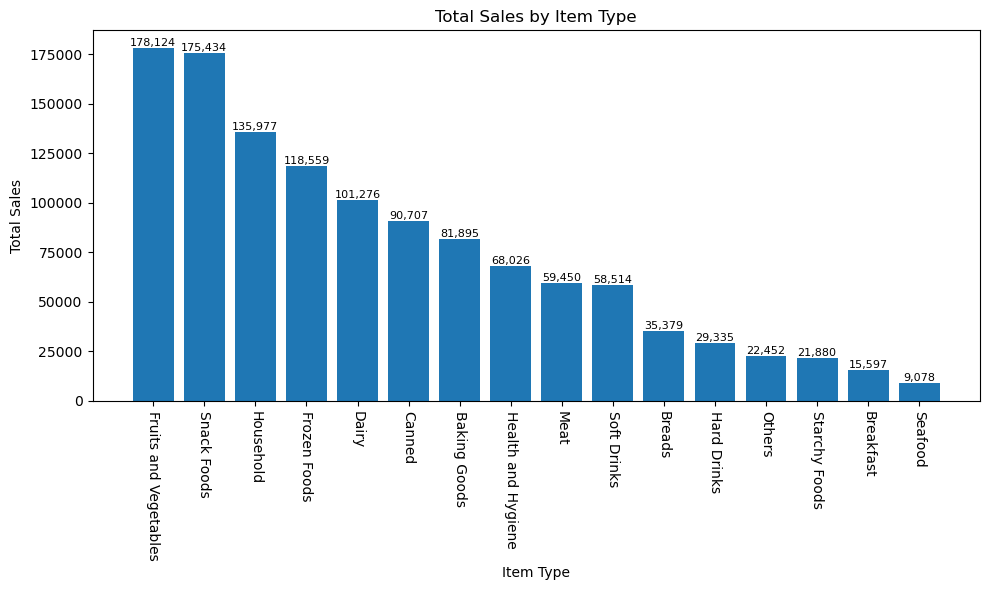

In [45]:
Sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(Sales_by_type.index, Sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom',fontsize=8)
 
plt.tight_layout()
plt.show()

#### **Fat Content by Outlet for Total Sales**

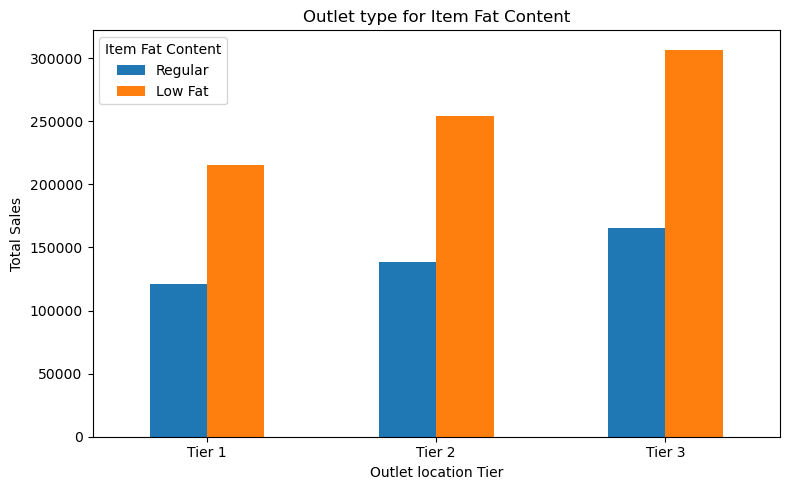

In [69]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = 'bar', figsize=(8,5), title ='Outlet type for Item Fat Content')
plt.xticks(rotation=360)
plt.xlabel('Outlet location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

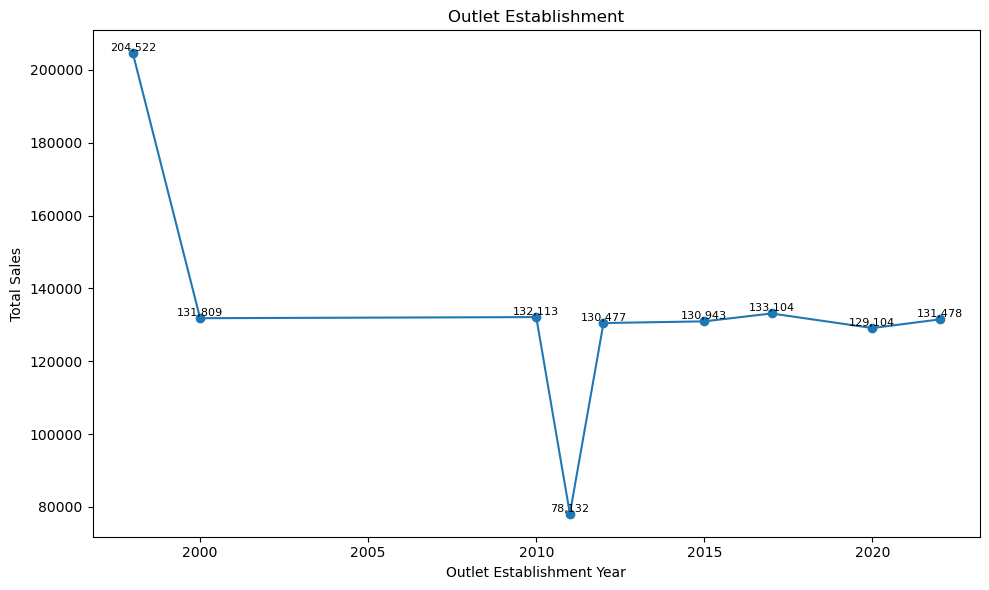

In [77]:
Sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(10,6))
plt.plot(Sales_by_year.index, Sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(Sales_by_year.index, Sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### **Total Sales by Outlet size**

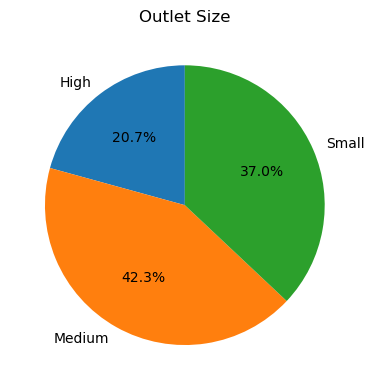

In [80]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

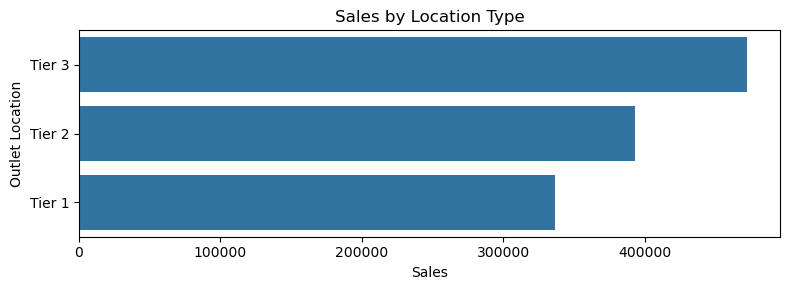

In [84]:
sales_by_location = df.groupby('Outlet Location Type').sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending = False)

plt.figure(figsize = (8,3))
sns.barplot(x='Sales', y='Outlet Location Type',data = sales_by_location)

plt.xlabel('Sales')
plt.ylabel('Outlet Location')
plt.title('Sales by Location Type')

plt.tight_layout()
plt.show()